We have stored the NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import imageio

In [3]:
import getpass

In [4]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

2022-02-23 20:47:07.429444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
import tensorflow as tf
import datetime

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
import azure.storage.blob

In [9]:
import sys
sys.path.append('../')

In [10]:
import imp

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [12]:
import data_utils as du

In [13]:
imp.reload(du)

<module 'data_utils' from '/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py'>

In [14]:
# here we connect to the Azure blob storage
connection_string = getpass.getpass()

 ·····························································································································································································


In [15]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [16]:
# we limit to a subfolder to test the functionality
#blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [17]:
container_name = 'naames'
account_name = 'ifcbwesteurope'

In [18]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [19]:
url_prefix

'https://ifcbwesteurope.blob.core.windows.net/naames/'

In [20]:
csv_url = url_prefix + 'image-file-directory.csv'

In [21]:
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [52]:
# subsample the full dataframe for workflow testing
#df_subsample = inventory_df.iloc[:10000,]
df_subsample = inventory_df.iloc[:10000,]

In [53]:
df_subsample

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,IFCB107D20151108T183117P00255_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00255,43.3728,-59.4867,38.840830,150.669198,46.626298,...,0.00210,0.00063,0.01105,0.08894,1.0,False,True,1,train,plankton
9996,IFCB107D20151108T183117P00257_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00257,43.3728,-59.4867,35.726644,137.160925,36.418685,...,0.00189,-0.00024,0.01096,0.04473,1.0,False,True,1,train,plankton
9997,IFCB107D20151108T183117P00266_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00266,43.3728,-59.4867,27.335640,65.335489,34.083045,...,0.00178,-0.00181,0.01107,0.13939,1.0,False,True,1,test,plankton
9998,IFCB107D20151108T183117P00268_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00268,43.3728,-59.4867,36.332180,132.045366,37.716263,...,0.00313,0.00891,0.04725,0.31958,1.0,False,True,1,train,plankton


## create png_path column and 3-column dataframe

In [54]:
# add a column of the png path to the df dataframe
df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))

/tmp/ipykernel_1208/1727142688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))


In [55]:
# create a dataframe with just the columns of png_path and high_group
df_files_labels = df_subsample[['png_path', 'high_group']]

In [56]:
# add a column called full_path 
df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))

/tmp/ipykernel_1208/1825214936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))


In [57]:
# THIS IS A TEST FOR SPEED OF GENERATOR ON LOCAL FILES VS BLOB
# add a column called full_path
#df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))

In [58]:
df_files_labels

,png_path,high_group,full_path
0,D20151104T112022_IFCB107/IFCB107D20151104T1120...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
1,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
2,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
3,D20151104T124515_IFCB107/IFCB107D20151104T1245...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
4,D20151105T174918_IFCB107/IFCB107D20151105T1749...,Dinoflagellate,https://ifcbwesteurope.blob.core.windows.net/n...
...,...,...,...
9995,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
9996,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
9997,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
9998,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcbwesteurope.blob.core.windows.net/n...


In [ ]:
labels

In [59]:
df_files_labels.full_path.iloc[0]

'https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151104T112022_IFCB107/IFCB107D20151104T112022P00433.png'

In [60]:
# -- 
# one hot encode the labels 

lb = LabelBinarizer()
labels = set(df_files_labels.high_group)
lb.fit(list(labels))
batch_size = 100

In [61]:
ls ..

D20151107T120416_IFCB107/  __pycache__/   ml_models.py
LICENSE                    data_utils.py  notebooks/
README.md                  logs/          requirements.txt


In [62]:
imageio.imread(df_files_labels.full_path.iloc[0])

Array([[199, 198, 197, ..., 198, 198, 198],
       [197, 199, 195, ..., 198, 198, 200],
       [200, 200, 203, ..., 199, 194, 196],
       ...,
       [203, 199, 204, ..., 200, 195, 203],
       [203, 200, 201, ..., 197, 198, 198],
       [201, 201, 200, ..., 199, 199, 200]], dtype=uint8)

In [33]:
# -- 
# instantiate generators 

#imageGen = du.image_generator(df_files_labels, batch_size, lb)

In [63]:
# split the data for testing and training
train, validation = train_test_split(df_files_labels, test_size=0.2)

In [64]:
# instantiate generators 

trainGen = du.image_generator(train, batch_size, lb)
validationGen = du.image_generator(validation, batch_size, lb)

In [65]:
imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151107T120416_IFCB107/IFCB107D20151107T120416P00874.png')

Array([[197, 201, 199, ..., 197, 198, 201],
       [199, 199, 198, ..., 196, 194, 198],
       [202, 199, 195, ..., 198, 200, 196],
       ...,
       [202, 199, 196, ..., 202, 204, 196],
       [201, 201, 203, ..., 203, 199, 197],
       [200, 201, 200, ..., 198, 196, 202]], dtype=uint8)

In [66]:
#%%time
#output = next(imageGen)

In [38]:
#output[0].shape

In [39]:
#output[1].shape

In [67]:
train.shape

(8000, 3)

### define CNN model

In [68]:
import ml_models

In [69]:
imp.reload(ml_models)

<module 'ml_models' from '/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../ml_models.py'>

In [70]:
ml_models.create_cnn_model_A1

<function ml_models.create_cnn_model_A1(width, height, depth, filters=(32, 16, 64, 32, 128, 128, 64, 256, 256, 128), regress=False)>

In [71]:
# define and compile cnn with function 
# should do layer by layer going forward for legibility

cnn = ml_models.create_cnn_model_A1(128, 128, 1, regress=False)
x = Dense(1000, activation="relu")(cnn.output)
x = Dropout(rate=0.1)(x)
x = Dense(len(labels), activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### train model

In [72]:
totalTrain = len(train)

In [73]:
totalVal = len(validation)

In [74]:
totalTrain

8000

In [75]:
import tensorflow as tf

In [76]:
tf.test.gpu_device_name()

2022-02-23 20:54:18.169038: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-23 20:54:18.169633: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-23 20:54:18.169683: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-23 20:54:18.169714: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 20:54:18.169728: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-23 20:54:18.169743: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-02-23 

'/device:GPU:0'

In [77]:
# When training with Keras's Model.fit(), adding the tf.keras.callbacks.
# TensorBoard callback ensures that logs are created and stored. 
# Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-02-23 20:54:20.844640: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-23 20:54:20.844679: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-23 20:54:20.845549: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-02-23 20:54:20.845574: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [78]:
%%time
# train model and save history object 

' training in smaller increments to monitor progress '

print("[INFO] training simple network...")
H = model.fit(
    trainGen,
    steps_per_epoch=totalTrain // batch_size,
    validation_data=validationGen,
    validation_steps=totalVal // batch_size,
    epochs=2,
    callbacks=[tensorboard_callback])

[INFO] training simple network...
Epoch 1/2
 2/80 [..............................] - ETA: 9s - loss: 2.2011 - accuracy: 0.3150   

2022-02-23 20:54:46.622024: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-23 20:54:46.622065: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-23 20:54:46.622127: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-02-23 20:54:46.721648: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-23 20:54:46.724731: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-02-23 20:54:46.725893: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-23 20:54:46.727116: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/20220223-205420/train/plugins/profile/202

80/80 [==============================] - 438s 5s/step - loss: 0.7220 - accuracy: 0.8229 - val_loss: 0.8309 - val_accuracy: 0.7960
Epoch 2/2
80/80 [==============================] - 438s 6s/step - loss: 0.3758 - accuracy: 0.9045 - val_loss: 1.2421 - val_accuracy: 0.7820
CPU times: user 3min 8s, sys: 13.6 s, total: 3min 22s
Wall time: 14min 43s


In [ ]:
!tensorboard dev upload --logdir ./logs \
  --name 'Simple experiment with basic CNN' \
  --description 'Training results from 10k images' \
  --one_shot

2022-02-23 21:19:41.315708: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


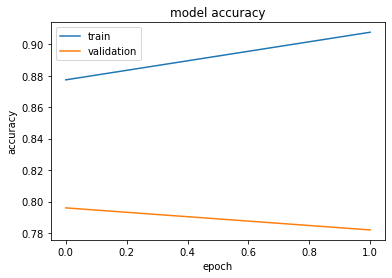

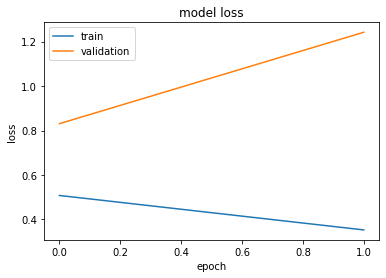

In [79]:
# plot info from model history object 

# list all data in history
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
%tensorboard --logdir logs/fit 

In [20]:
#imp.reload(ml_models)

In [13]:
#account_key = input('input_account_key')

In [21]:
# attach the azure url
#blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [20]:
#%%time
#dataset = []
#failed_urls = []
#for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
#    if 'png' in blob_url:
#        try:
#            image = imageio.imread(blob_url)
#            dataset.append(image)
#        except Exception as e:
#            failed_urls.append(blob_url)
#            pass
        

In [22]:
#print(failed_urls)

In [23]:
#len(dataset)

In [25]:
# show an image

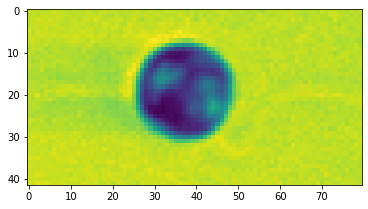

In [43]:
plt.imshow(dataset[0])

In [30]:
dataset[0]

In [15]:
image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')

In [17]:
image

Array([[203, 200, 200, ..., 200, 198, 200],
       [199, 200, 198, ..., 195, 199, 194],
       [201, 201, 205, ..., 200, 197, 198],
       ...,
       [205, 203, 207, ..., 197, 197, 197],
       [205, 203, 203, ..., 200, 199, 196],
       [207, 202, 209, ..., 201, 198, 199]], dtype=uint8)